In [1]:
# Data Frame -> Row, Col 을 가지는 구조
# List, Dictionary, ndarray 등 여러가지 자료구조로 생성 가능

In [4]:
import pandas as pd

## List로 Data Frame 생성

In [55]:
data_list = [['Steve','23','male'],
             ['Alex', '25', 'male'],
             ['Juliet', '20', 'female']]

In [56]:
data_list

[['Steve', '23', 'male'], ['Alex', '25', 'male'], ['Juliet', '20', 'female']]

In [57]:
dataframe = pd.DataFrame(data_list)

In [58]:
dataframe

,0,1,2
0,Steve,23,male
1,Alex,25,male
2,Juliet,20,female


In [59]:
# Index, Column을 명시해주지 않으면 0번 인덱스부터 각각 값이 부여된다.

## DataFrame 생성 시 Column, Index(Row) 속성값 지정해주기

In [60]:
dataframe_2 = pd.DataFrame(data_list, index= ['first','second','third'],columns = ['name', 'age', 'gender']  )

In [61]:
print(">> Index와 Columns를 할당하여 DataFrame이 생성된 모습")
print("-"*40)
dataframe_2

>> Index와 Columns를 할당하여 DataFrame이 생성된 모습
----------------------------------------


,name,age,gender
first,Steve,23,male
second,Alex,25,male
third,Juliet,20,female


## DataFrame 값 출력하기

In [62]:
# 앞 부분 n 개만 출력 (n=2)
dataframe_2.head(2)

,name,age,gender
first,Steve,23,male
second,Alex,25,male


In [63]:
# 뒷 부분 n 개만 출력 (n=2)
dataframe_2.tail(2)

,name,age,gender
second,Alex,25,male
third,Juliet,20,female


In [64]:
# 특정 Column 값 출력
dataframe_2['age']

first     23
second    25
third     20
Name: age, dtype: object

In [65]:
dataframe_2['name']

first      Steve
second      Alex
third     Juliet
Name: name, dtype: object

In [66]:
# 특정 Column의 고유값 출력
print(dataframe_2['gender'].unique())

['male' 'female']


In [67]:
# 특정 Column의 고유값 개수 출력 
print(dataframe_2)
print()
print(dataframe_2['age'].nunique())

          name age  gender
first    Steve  23    male
second    Alex  25    male
third   Juliet  20  female

3


In [68]:
# DataFrame Slice
dataframe_2.iloc[:,1:3]

,age,gender
first,23,male
second,25,male
third,20,female


In [69]:
# DataFrame을 Histogram으로 출력
dataframe_2['age'] = dataframe_2['age'].astype(int)
print(type(dataframe_2['age'][0]))
#dataframe_2['age'].plot.hist()

<class 'numpy.int64'>


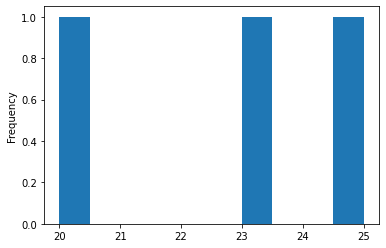

In [70]:
dataframe_2['age'].plot.hist()

Index(['name', 'age', 'gender'], dtype='object')


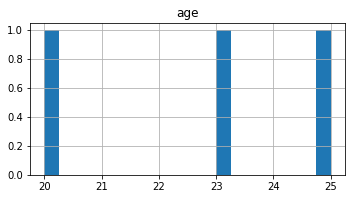

In [79]:
from matplotlib import pyplot as plt
#dataframe_2['name'] = pd.to_numeric(dataframe_2['name'])
#dataframe_2['name'].plot.hist()
cols_list = dataframe_2.columns[0:]
print(cols_list)

dataframe_2[cols_list].hist(figsize=(35, 21), grid=True, layout=(6,5), bins=20)
plt.show()


## DataFrame에 존재하는 Column 정보 출력하기

In [77]:
print(dataframe_2.columns)

Index(['name', 'age', 'gender'], dtype='object')


In [82]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

dataframe_2['name'] = label_encoder.fit_transform(dataframe_2['name'])
dataframe_2['gender'] = label_encoder.fit_transform(dataframe_2['gender'])



In [83]:
dataframe_2

,name,age,gender
first,2,23,1
second,0,25,1
third,1,20,0


Index(['name', 'age', 'gender'], dtype='object')


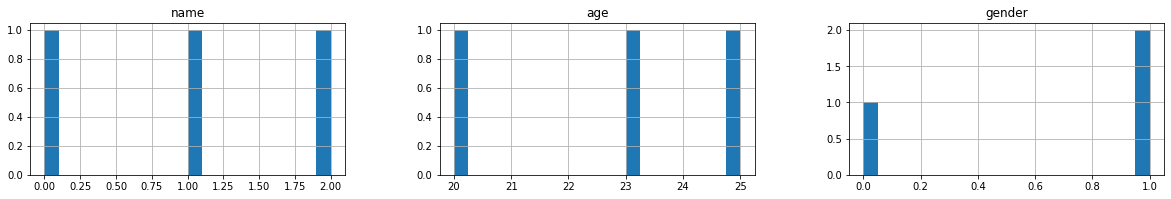

In [86]:
cols_list = dataframe_2.columns[0:]
print(cols_list)

dataframe_2[cols_list].hist(figsize=(35, 21), grid=True, layout=(6,5), bins=20)
plt.show()

## Groupby

In [87]:
# df = pd.DataFrame({
#     'city': ['부산', '부산', '부산', '부산', '서울', '서울', '서울'],
#     'fruits': ['apple', 'orange', 'banana', 'banana', 'apple', 'apple', 'banana'],
#     'price': [100, 200, 250, 300, 150, 200, 400],
#     'quantity': [1, 2, 3, 4, 5, 6, 7]
# })
# df

In [129]:
dataframe_3 = pd.DataFrame([['Busan','apple',100,1],
               ['Busan','orange',200,2],
               ['Busan','banana',250,3],
               ['Seoul','banana',300,4],
               ['Seoul', 'apple',150,5],
               ['Seoul','banana',400,6], 
               ['Seoul','apple',540,7], 
               ['Seoul','orange',500,8], 
               ['Seoul','banana',630,9]], 

               columns = ['city','fruits','price','quantity']
)

In [130]:
dataframe_3

,city,fruits,price,quantity
0,Busan,apple,100,1
1,Busan,orange,200,2
2,Busan,banana,250,3
3,Seoul,banana,300,4
4,Seoul,apple,150,5
5,Seoul,banana,400,6
6,Seoul,apple,540,7
7,Seoul,orange,500,8
8,Seoul,banana,630,9


In [131]:
dataframe_3.groupby('city').mean()

,price,quantity
city,,
Busan,183.333333,2.0
Seoul,420.000000,6.5


In [132]:
dataframe_3.groupby(['city','fruits']).mean()

price  quantity
city  fruits                      
Busan apple   100.000000  1.000000
      banana  250.000000  3.000000
      orange  200.000000  2.000000
Seoul apple   345.000000  6.000000
      banana  443.333333  6.333333
      orange  500.000000  8.000000

In [133]:
dataframe_3

,city,fruits,price,quantity
0,Busan,apple,100,1
1,Busan,orange,200,2
2,Busan,banana,250,3
3,Seoul,banana,300,4
4,Seoul,apple,150,5
5,Seoul,banana,400,6
6,Seoul,apple,540,7
7,Seoul,orange,500,8
8,Seoul,banana,630,9


In [134]:
dataframe_3_seoul = dataframe_3.loc[dataframe_3['city'] == '서울']

In [135]:
dataframe_3_seoul

,city,fruits,price,quantity


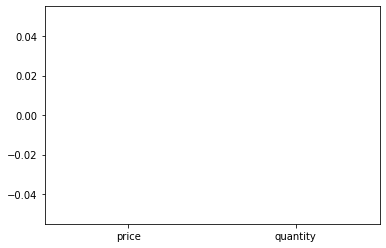

In [136]:
dataframe_3_seoul.plot(kind='box')

In [137]:
import seaborn as sns

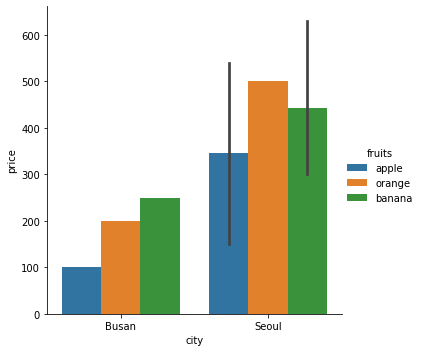

In [143]:
sns.catplot(x="city", y="price",
            data=dataframe_3,                         
            hue="fruits",
            kind="bar")
plt.show()

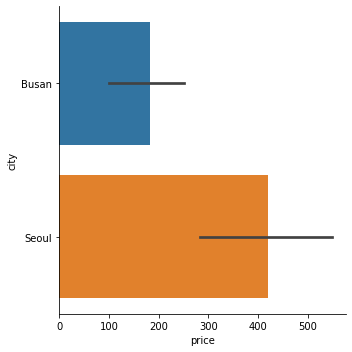

In [145]:
sns.catplot(x="price", y="city",
            data=dataframe_3,                         
            #hue="fruits",
            kind="bar")
plt.show()

In [147]:
dataframe_3
#pivot = dataframe_3.pivot_table(index='day', columns='size', values='tip')

,city,fruits,price,quantity
0,Busan,apple,100,1
1,Busan,orange,200,2
2,Busan,banana,250,3
3,Seoul,banana,300,4
4,Seoul,apple,150,5
5,Seoul,banana,400,6
6,Seoul,apple,540,7
7,Seoul,orange,500,8
8,Seoul,banana,630,9


In [149]:
pivot = dataframe_3.pivot_table(index='city', columns='fruits', values='price')

In [151]:
print(pivot)

fruits  apple      banana  orange
city                             
Busan   100.0  250.000000   200.0
Seoul   345.0  443.333333   500.0


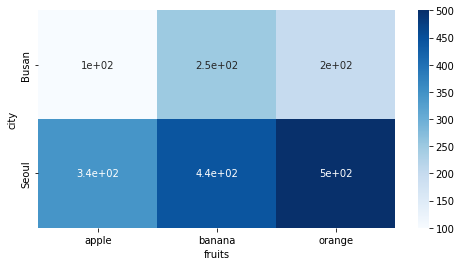

In [152]:
plt.figure(figsize=(8, 4))
sns.heatmap(pivot, cmap='Blues', annot=True)
plt.show()

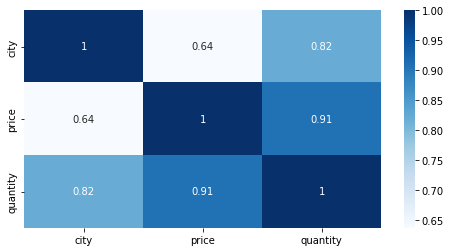

In [156]:
plt.figure(figsize=(8, 4))
dataframe_3['city'] = label_encoder.fit_transform(dataframe_3['city'])
sns.heatmap(dataframe_3.corr(), cmap='Blues', annot=True)
plt.show()